<h1>Import the necessary modules<h1>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import PIL
import tensorflow as tf
from tensorflow import keras 

download the data from the following link


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir


WindowsPath('datasets/flower_photos')

In [5]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses=list(data_dir.glob('roses/*'))

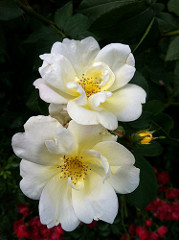

In [7]:
PIL.Image.open(str(roses[0]))

In [8]:
flowes_images_dict={
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
    
}

In [9]:
flowers_labesls={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4

}

In [10]:
x,y=[],[]

for flower,images in flowes_images_dict.items():
    for image in images:
        img=cv.imread(str(image))
        resized_image=cv.resize(img,(180,180))
        x.append(resized_image)
        y.append(flowers_labesls[flower])


In [11]:
x=np.array(x)
y=np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [13]:
X_train[0]

array([[[245, 180, 131],
        [245, 179, 131],
        [246, 180, 132],
        ...,
        [240, 173, 124],
        [241, 173, 124],
        [244, 172, 124]],

       [[247, 181, 133],
        [246, 180, 132],
        [246, 180, 132],
        ...,
        [242, 173, 124],
        [242, 173, 124],
        [242, 173, 124]],

       [[247, 181, 133],
        [247, 181, 133],
        [247, 181, 133],
        ...,
        [242, 173, 124],
        [242, 173, 124],
        [242, 173, 124]],

       ...,

       [[255, 199, 150],
        [255, 199, 150],
        [255, 199, 150],
        ...,
        [241, 186, 143],
        [151, 153, 129],
        [ 62, 123, 109]],

       [[255, 199, 150],
        [255, 199, 150],
        [254, 198, 149],
        ...,
        [247, 189, 144],
        [166, 157, 131],
        [ 66, 122, 111]],

       [[255, 199, 150],
        [255, 199, 151],
        [254, 198, 149],
        ...,
        [248, 188, 143],
        [173, 158, 129],
        [ 64, 123, 110]]

In [14]:
x[0][0]

array([[134, 136, 136],
       [142, 142, 142],
       [146, 146, 146],
       [149, 148, 148],
       [152, 151, 151],
       [148, 150, 150],
       [147, 149, 149],
       [152, 152, 152],
       [157, 151, 153],
       [161, 156, 155],
       [163, 157, 156],
       [161, 156, 155],
       [159, 154, 153],
       [160, 154, 153],
       [161, 156, 155],
       [163, 159, 158],
       [162, 158, 157],
       [161, 156, 155],
       [158, 150, 150],
       [146, 141, 140],
       [139, 137, 136],
       [134, 135, 135],
       [132, 134, 134],
       [138, 138, 138],
       [137, 138, 138],
       [134, 138, 138],
       [134, 138, 138],
       [134, 139, 138],
       [132, 137, 136],
       [136, 141, 140],
       [135, 140, 139],
       [140, 144, 143],
       [159, 157, 157],
       [162, 157, 156],
       [158, 154, 153],
       [149, 151, 149],
       [145, 147, 147],
       [142, 144, 144],
       [136, 140, 140],
       [135, 140, 139],
       [136, 141, 140],
       [140, 146

In [15]:
total_classes=5

In [16]:
model=keras.Sequential([

    #CNN network
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),

    #ANN network
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(total_classes)



])

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [18]:
X_train=X_train/255
X_test=X_test/255

In [19]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
92/92 [==============================] - 72s 759ms/step - loss: 1.3021 - accuracy: 0.4527
Epoch 2/10
92/92 [==============================] - 68s 740ms/step - loss: 0.9618 - accuracy: 0.6236
Epoch 3/10
92/92 [==============================] - 70s 762ms/step - loss: 0.7555 - accuracy: 0.7217
Epoch 4/10
92/92 [==============================] - 77s 834ms/step - loss: 0.5187 - accuracy: 0.8123
Epoch 5/10
92/92 [==============================] - 76s 824ms/step - loss: 0.3191 - accuracy: 0.8910
Epoch 6/10
92/92 [==============================] - 76s 822ms/step - loss: 0.2014 - accuracy: 0.9377
Epoch 7/10
92/92 [==============================] - 75s 820ms/step - loss: 0.1044 - accuracy: 0.9676
Epoch 8/10
92/92 [==============================] - 75s 818ms/step - loss: 0.0597 - accuracy: 0.9813
Epoch 9/10
92/92 [==============================] - 83s 902ms/step - loss: 0.0581 - accuracy: 0.9840
Epoch 10/10
92/92 [==============================] - 78s 853ms/step - loss: 0.0459 - accura

In [21]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 4s 160ms/step - loss: 1.7323 - accuracy: 0.6649


[1.7322815656661987, 0.664850115776062]

In [22]:
prediction=model.predict(X_test)

23/23 [==============================] - 4s 171ms/step


In [23]:
prediction[25]

array([-1.101959 ,  2.6553226, -4.454217 , 10.123913 , -2.3838718],
      dtype=float32)

In [24]:
pred=[]
for i in range(len(prediction)):
    pred.append(np.argmax(prediction[i]))
pred[:5]

[0, 1, 3, 3, 4]

3

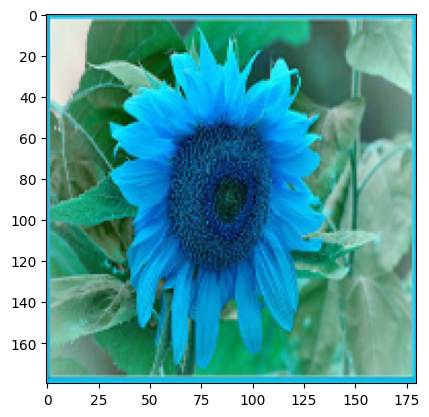

In [28]:
plt.imshow(X_test[25])
pred[25]